In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

import time
import datetime

In [2]:
stock = np.loadtxt('../data/AAPL_170801-180823_minute.txt')

In [31]:
st_time = 1509670000
i_st =  np.argmax(stock[:,0]>st_time)
end_time = 1516000000
i_end =  np.argmax(stock[:,0]>end_time)


price = stock[i_st:i_end, 2]
volume = stock[i_st:i_end,1]
unxtime = (stock[i_st:i_end,0] - st_time)/60
time = np.arange(price.shape[0])
fs = 60. #sampling rate (per hour) - minute data

In [32]:
print('Approx days:', (price.shape[0]/60.)/6.5)

Approx days: 47.53846153846154


[0.00000000e+00 3.23624595e-03 6.47249191e-03 ... 2.99935275e+01
 2.99967638e+01 3.00000000e+01]
[0.         0.00323625 0.00647249 0.00970874 0.01294498 0.01618123]


Text(0.5,0,'Frequency ${hour^{-1}}$')

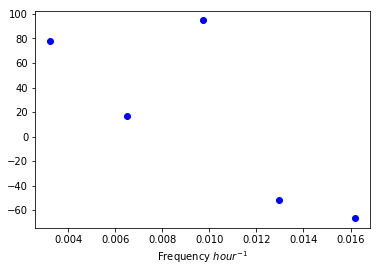

In [34]:
freq = np.fft.rfftfreq(price.shape[0], 1/fs)
i_fmax = np.argmin(freq< 1/60.)
freq = freq[:i_fmax]

print(freq)

price_ft = np.real(np.fft.rfft(price, norm='ortho'))
price_ft = price_ft[:i_fmax]

plt.plot(freq[1:], price_ft[1:], 'ob')
plt.xlabel('Frequency ${hour^{-1}}$')

In [37]:

def test_func(x,a,b,c):
    return a * np.sin(b*x) + c

TypeError: unsupported operand type(s) for ^: 'float' and 'int'

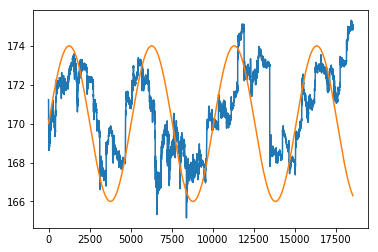

In [57]:
plt.plot(time, price)
plt.plot(time, test_func(time,4,0.00125, 170))

(18540,)


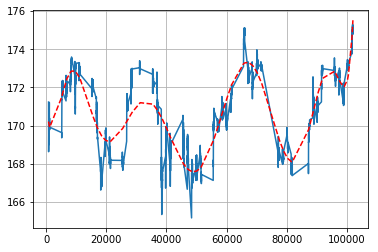

In [6]:
plt.plot(unxtime, price)
p = np.polyfit(unxtime, price, 10)
price_pol = np.polyval(p, unxtime)
plt.plot(unxtime, price_pol, '--r')
plt.grid()
print(price.shape)

In [7]:
from scipy import optimize

def test_func(x,a,b,c):
    return a * np.sin(b*x + c)

[ 0.00283363  0.99994739 -0.94078251] 4.597476914778866 5.082000000000008


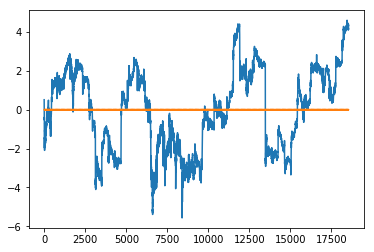

In [8]:
#center the data
from sklearn import preprocessing #can't implement it
normalized_price = price - price.mean()

time = np.linspace(0,len(normalized_price), num = len(normalized_price))
plt.plot(time,normalized_price)

params, params_covariance = optimize.curve_fit(test_func, time, 
                                              normalized_price,
                                              p0 = [(max(normalized_price)-min(normalized_price))/2, 1, 0])

print(params, (max(normalized_price)-min(normalized_price))/2)

plt.plot(time, test_func(time,params[0],params[1],params[2]))